Model Training
1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [6]:

df = pd.read_csv('data/raw.csv')

Show Top 5 Records

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57



Preparing X and Y variables

In [9]:

X = df.drop(columns=['math_score'],axis=1)


In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group D,master's degree,standard,none,70,75
1,female,group C,bachelor's degree,free/reduced,completed,83,83
2,female,group D,some college,free/reduced,none,89,86
3,male,group C,master's degree,free/reduced,none,67,66
4,male,group E,high school,standard,none,64,57


In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group D' 'group C' 'group E' 'group B' 'group A']
Categories in'parental level of education' variable: ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
y = df['math_score']
y

0      62
1      66
2      79
3      61
4      73
       ..
796    69
797    53
798    50
799    85
800    85
Name: math_score, Length: 801, dtype: int64

In [14]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [15]:

X = preprocessor.fit_transform(X)

In [16]:
X.shape

(801, 19)

In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((640, 19), (161, 19))

Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3930
- Mean Absolute Error: 4.2848
- R2 Score: 0.8710
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0645
- Mean Absolute Error: 4.2532
- R2 Score: 0.8850


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6407
- Mean Absolute Error: 5.2534
- R2 Score: 0.8043
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0414
- Mean Absolute Error: 4.6945
- R2 Score: 0.8364


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3935
- Mean Absolute Error: 4.2834
- R2 Score: 0.8709
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0578
- Mean Absolute Error: 4.2466
- R2 Score: 0.8853


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.0262
- Mean Absolute Error: 4.8191
- R2 Score: 0.8389
-----------------------

c:\Projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aanam\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3326
- Mean Absolute Error: 1.8558
- R2 Score: 0.9759
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.8198
- Mean Absolute Error: 4.6657
- R2 Score: 0.8482


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.6951
- Mean Absolute Error: 0.4492
- R2 Score: 0.9979
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3465
- Mean Absolute Error: 5.2199
- R2 Score: 0.8195


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2.7510
- Mean Absolute Error: 2.1798
- R2 Score: 0.9664
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4395
- Mean Absolute Error: 4.4359
- R2 Score: 0.8674


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9059
- Mean Absolute Error: 4.8710
- R2 Score: 0.84

Result

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.885334
0,Linear Regression,0.885032
7,CatBoosting Regressor,0.867375
5,Random Forest Regressor,0.848183
1,Lasso,0.836400
8,AdaBoost Regressor,0.834461
6,XGBRegressor,0.819457
3,K-Neighbors Regressor,0.802754
4,Decision Tree,0.677436


Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.50



Plot y_pred and y_test

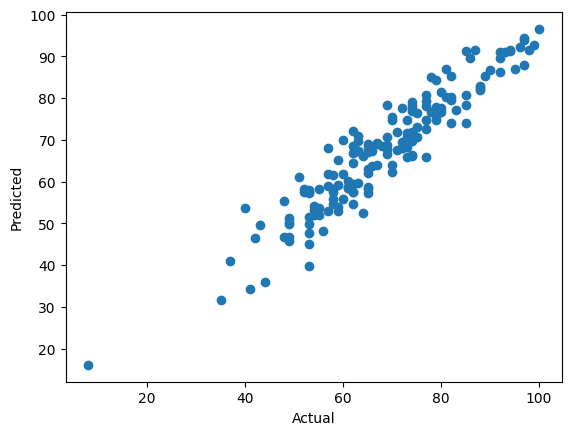

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


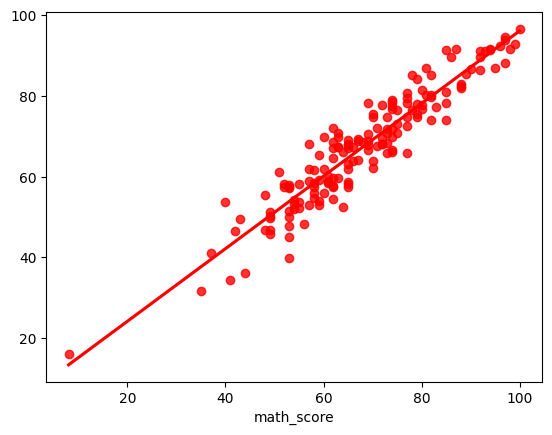

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values


In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
697,54,51.957165,2.042835
668,62,59.548177,2.451823
63,63,70.887980,-7.887980
534,57,58.992370,-1.992370
66,69,67.850939,1.149061
...,...,...,...
799,85,80.855827,4.144173
745,8,16.118680,-8.118680
513,77,79.409496,-2.409496
671,82,79.599865,2.400135
